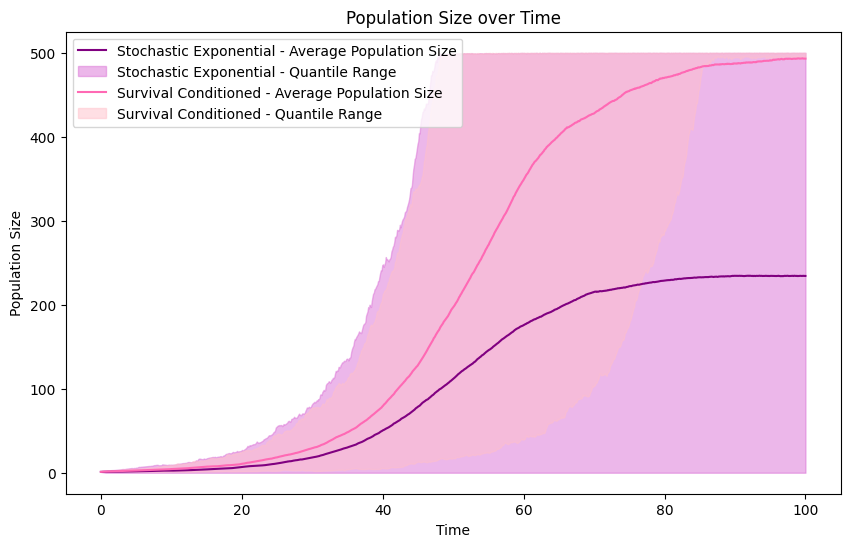

Extinction Probability (Stochastic Exponential): 0.53


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    carrying_capacity = params['carrying_capacity']
    max_time = params['max_time']

    time_points = [0]
    population_sizes = [population]

    while population > 0 and time_points[-1] < max_time:
        next_event_time = np.random.exponential(1 / (death_rate * population + birth_rate * population))

        if np.random.rand() < birth_rate / (birth_rate + death_rate) and population < carrying_capacity:
            population += 1
        else:
            population -= 1

        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100, survival_conditioned=False):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']

    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    # Interpolating population sizes
    num_points = 1000
    average_time_points = np.linspace(0, max_time, num_points)

    if survival_conditioned:
        non_extinct_populations = [pop for pop in all_population_sizes if pop[-1] > 0]
        non_extinct_times = [time for time, pop in zip(all_time_points, all_population_sizes) if pop[-1] > 0]
        interpolated_populations = np.zeros((len(non_extinct_populations), num_points))

        for i, (time, pop) in enumerate(zip(non_extinct_times, non_extinct_populations)):
            interpolated_populations[i] = np.interp(average_time_points, time, pop)
    else:
        interpolated_populations = np.zeros((num_simulations, num_points))

        for i in range(num_simulations):
            interpolated_populations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])

    average_population_sizes = np.mean(interpolated_populations, axis=0)
    lower_quantile = np.quantile(interpolated_populations, 0.05, axis=0)
    upper_quantile = np.quantile(interpolated_populations, 0.95, axis=0)

    extinction_probability = extinction_count / num_simulations if not survival_conditioned else None

    return average_time_points, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_multiple_simulations_with_quantiles(average_time_points1, average_population_sizes1, lower_quantile1, upper_quantile1,
                                             average_time_points2, average_population_sizes2, lower_quantile2, upper_quantile2):
    plt.figure(figsize=(10, 6))

    # Plot for stochastic exponential growth model
    plt.plot(average_time_points1, average_population_sizes1, color='purple', linestyle='-', label='Stochastic Exponential - Average Population Size')
    plt.fill_between(average_time_points1, lower_quantile1, upper_quantile1, color='orchid', alpha=0.5, label='Stochastic Exponential - Quantile Range')

    # Plot for survival conditioned stochastic exponential model
    plt.plot(average_time_points2, average_population_sizes2, color='hotpink', linestyle='-', label='Survival Conditioned - Average Population Size')
    plt.fill_between(average_time_points2, lower_quantile2, upper_quantile2, color='pink', alpha=0.5, label='Survival Conditioned - Quantile Range')

    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time')
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, carrying_capacity=500)
num_simulations = 100

# Stochastic exponential growth model
average_time_points1, average_population_sizes1, lower_quantile1, upper_quantile1, extinction_probability1 = run_multiple_simulations_with_quantiles(params, num_simulations)

# Survival conditioned stochastic exponential growth model
average_time_points2, average_population_sizes2, lower_quantile2, upper_quantile2, _ = run_multiple_simulations_with_quantiles(params, num_simulations, survival_conditioned=True)

plot_multiple_simulations_with_quantiles(average_time_points1, average_population_sizes1, lower_quantile1, upper_quantile1,
                                         average_time_points2, average_population_sizes2, lower_quantile2, upper_quantile2)

print(f"Extinction Probability (Stochastic Exponential): {extinction_probability1:.2f}")


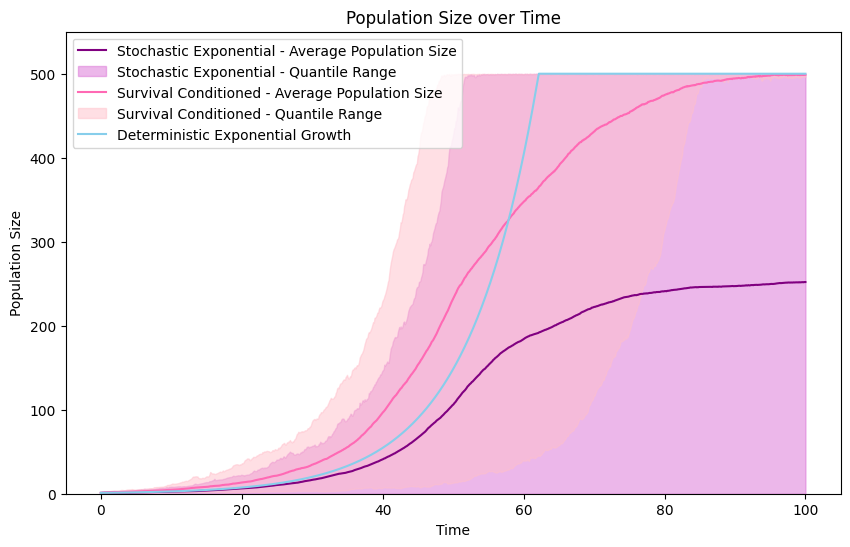

Extinction Probability (Stochastic Exponential): 0.49


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    carrying_capacity = params['carrying_capacity']
    max_time = params['max_time']

    time_points = [0]
    population_sizes = [population]

    while population > 0 and time_points[-1] < max_time:
        next_event_time = np.random.exponential(1 / (death_rate * population + birth_rate * population))

        if np.random.rand() < birth_rate / (birth_rate + death_rate) and population < carrying_capacity:
            population += 1
        else:
            population -= 1

        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100, survival_conditioned=False):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']

    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    # Interpolating population sizes
    num_points = 1000
    average_time_points = np.linspace(0, max_time, num_points)

    if survival_conditioned:
        non_extinct_populations = [pop for pop in all_population_sizes if pop[-1] > 0]
        non_extinct_times = [time for time, pop in zip(all_time_points, all_population_sizes) if pop[-1] > 0]
        interpolated_populations = np.zeros((len(non_extinct_populations), num_points))

        for i, (time, pop) in enumerate(zip(non_extinct_times, non_extinct_populations)):
            interpolated_populations[i] = np.interp(average_time_points, time, pop)
    else:
        interpolated_populations = np.zeros((num_simulations, num_points))

        for i in range(num_simulations):
            interpolated_populations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])

    average_population_sizes = np.mean(interpolated_populations, axis=0)
    lower_quantile = np.quantile(interpolated_populations, 0.05, axis=0)
    upper_quantile = np.quantile(interpolated_populations, 0.95, axis=0)

    extinction_probability = extinction_count / num_simulations if not survival_conditioned else None

    return average_time_points, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def deterministic_growth(params):
    initial_population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    carrying_capacity = params['carrying_capacity']
    max_time = params['max_time']
    
    time_points = np.linspace(0, max_time, 1000)
    growth_rate = birth_rate - death_rate
    population_sizes = initial_population * np.exp(growth_rate * time_points)
    
    # Adjust for carrying capacity
    population_sizes = np.minimum(population_sizes, carrying_capacity)
    
    return time_points, population_sizes

def plot_multiple_simulations_with_quantiles(average_time_points1, average_population_sizes1, lower_quantile1, upper_quantile1,
                                             average_time_points2, average_population_sizes2, lower_quantile2, upper_quantile2,
                                             deterministic_time_points, deterministic_population_sizes):
    plt.figure(figsize=(10, 6))

    # Plot for stochastic exponential growth model
    plt.plot(average_time_points1, average_population_sizes1, color='purple', linestyle='-', label='Stochastic Exponential - Average Population Size')
    plt.fill_between(average_time_points1, lower_quantile1, upper_quantile1, color='orchid', alpha=0.5, label='Stochastic Exponential - Quantile Range')

    # Plot for survival conditioned stochastic exponential model
    plt.plot(average_time_points2, average_population_sizes2, color='hotpink', linestyle='-', label='Survival Conditioned - Average Population Size')
    plt.fill_between(average_time_points2, lower_quantile2, upper_quantile2, color='pink', alpha=0.5, label='Survival Conditioned - Quantile Range')

    # Plot for deterministic exponential growth model
    plt.plot(deterministic_time_points, deterministic_population_sizes, color='skyblue', linestyle='-', label='Deterministic Exponential Growth')

    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time')
    plt.ylim(0, 550)  # Set y-axis limit
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, carrying_capacity=500)
num_simulations = 100

# Stochastic exponential growth model
average_time_points1, average_population_sizes1, lower_quantile1, upper_quantile1, extinction_probability1 = run_multiple_simulations_with_quantiles(params, num_simulations)

# Survival conditioned stochastic exponential growth model
average_time_points2, average_population_sizes2, lower_quantile2, upper_quantile2, _ = run_multiple_simulations_with_quantiles(params, num_simulations, survival_conditioned=True)

# Deterministic exponential growth model
deterministic_time_points, deterministic_population_sizes = deterministic_growth(params)

plot_multiple_simulations_with_quantiles(average_time_points1, average_population_sizes1, lower_quantile1, upper_quantile1,
                                         average_time_points2, average_population_sizes2, lower_quantile2, upper_quantile2,
                                         deterministic_time_points, deterministic_population_sizes)

print(f"Extinction Probability (Stochastic Exponential): {extinction_probability1:.2f}")
